# Importing needed libraries

In [74]:
import numpy as np
import seaborn as sns
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import sklearn.datasets as sd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , recall_score
from sklearn.model_selection import train_test_split 
from sklearn.feature_extraction.text import TfidfVectorizer
import sklearn.feature_extraction
from nltk.tokenize import word_tokenize
import math
from collections import Counter 
from nltk.stem import WordNetLemmatizer  
from nltk.corpus import stopwords


# Importing Data

In [75]:
df = pd.read_csv('mail_data.csv')

# Analyzing Data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
Number of Null values : 0
  Category                                            Message
0        0  Go until jurong point, crazy.. Available only ...
1        0                      Ok lar... Joking wif u oni...
2        1  Free entry in 2 a wkly comp to win FA Cup fina...
3        0  U dun say so early hor... U c already then say...
4        0  Nah I don't think he goes to usf, he lives aro...
5        1  FreeMsg Hey there darling it's been 3 week's n...
6        0  Even my brother is not like to speak with me. ...
7        0  As per your request 'Melle Melle (Oru Minnamin...
8        1  WINNER!! As a valued network customer you have...
9        1  Had your mobile 11 months or more? U R enti

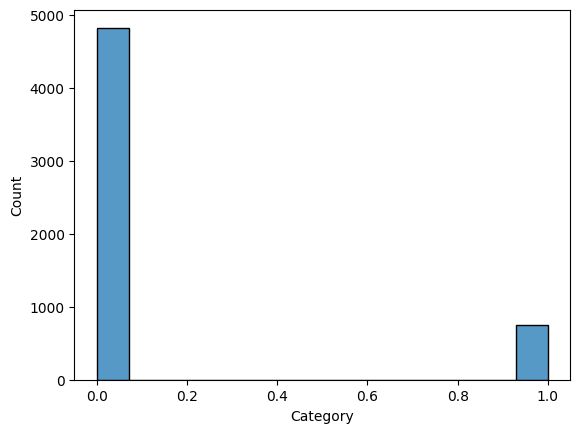

In [76]:
df.describe().T

df.info(verbose = True,show_counts = True)

# checking for NULL values

print(f'Number of Null values : {df.isnull().sum().sum()}');

# tranforming labels to numerical values  0 -> non-spam , 1 -> spam 

df.loc[df['Category'] == 'spam' , 'Category'] = 1;

df.loc[df['Category'] == 'ham' , 'Category'] = 0;

sns.histplot(data = df['Category']);

print(df.head(n = 10))

# splitting to features and labels

features = df['Message']; 

label = df['Category'];

print("These are features  : ",features)

print("These are labels :  " , label)

# splitting data to (train,test)  data

x_train , x_test , y_train , y_test = train_test_split(features , label , test_size = 0.2 , random_state = 40);



# Tokenizing & extracting features

In [77]:
# nltk.download('stopwords');
# nltk.download('punkt');
# word tokenization + removing non-alpha caracters + removing stop words + Lemmatization
# df['tokens'] = df['Message'].apply(word_tokenize);
# df['tokens'] = df['tokens'].apply(lambda arr : [token.lower() for token in arr if token not in stopwords.words('english') and token.isalpha() ])

vecto = TfidfVectorizer(min_df = 3 , stop_words = 'english' , lowercase = True);

x_train_num = np.array(vecto.fit_transform(x_train).toarray());

x_test_num = vecto.transform(x_test)

y_train = y_train.astype('int')

y_test = y_test.astype('int')


print("These are the features : " , vecto.get_feature_names_out());

print(" Those are the extracted numerical data & Labels : "  , x_train_num.shape , y_train  );




These are the features :  ['00' '000' '02' ... 'yun' 'yup' 'zed']
 Those are the extracted numerical data & Labels :  (4457, 2215) 15      1
1301    0
3059    1
3123    1
1884    0
       ..
4722    0
3340    0
5426    0
3064    1
3398    0
Name: Category, Length: 4457, dtype: int32


# Training the model & testing using scikit learn


In [78]:
model = LogisticRegression();

model.fit(x_train_num,y_train);

# testing our model

x_test_prediction = model.predict(x_test_num);

print(accuracy_score(y_test,x_test_prediction));

# recall calc 

print(recall_score(y_test , x_test_prediction));



0.9704035874439462
0.7916666666666666


# Spam / ham mail prediction

In [85]:
# mail = ["You have earned 300$ , pay 100$ to get it !! . consider subsribing to this email for more opportunities in the near future !!"];
mail = ["I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times"]

# tfidf vectorizing mail : 

# vecto.fit(mail) 

mail_num = vecto.transform(mail);

print(mail_num)

# these are the extracted features : 

print(vecto.get_feature_names_out());
        
pre = model.predict(mail_num);

if pre == 1 :
    print("the Mail is a  : spam ");
else:
    print("the mail is : Ham") 
    




  (0, 2189)	0.25096113922840113
  (0, 2166)	0.24671204757113105
  (0, 2164)	0.23622788795843708
  (0, 2161)	0.25574267781882154
  (0, 2065)	0.19325282235570754
  (0, 1954)	0.24288861434583395
  (0, 1925)	0.2377873881238193
  (0, 1679)	0.2977123577916796
  (0, 1630)	0.19856727210263866
  (0, 1528)	0.569716588637384
  (0, 1345)	0.25574267781882154
  (0, 932)	0.21732927998928006
  (0, 878)	0.1917926784206866
['00' '000' '02' ... 'yun' 'yup' 'zed']
the mail is : Ham
